# PROYECTO CORTE 1
Presentado por : Paula Andrea Bernal Castillo - 64191069

**EXPLORACIÓN INICIAL**



In [34]:
# Cargar librerías
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, Normalizer
from sklearn.impute import KNNImputer
from datetime import datetime

In [15]:
from google.colab import files
uploaded = files.upload()


Saving datos_marketing.csv to datos_marketing (1).csv


**LIMPIEZA DE DATOS**

In [17]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("datos_marketing.csv")

# Mostrar los primeros datos del DataFrame
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,172,88,88,8,10,4,no,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,2,1,6,1,1,2,no,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,111,21,42,8,2,10,no,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,10,3,5,2,0,4,no,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,46,27,15,5,3,6,no,0


In [18]:
# Mostrar ultimos datos del DataFrame
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,709,43,182,42,118,247,9,3,4,no,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,406,0,30,0,0,8,8,2,5,no,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,908,48,217,32,12,24,2,3,13,no,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,428,30,214,80,30,61,6,5,10,no,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,84,3,61,2,1,21,3,1,4,no,0


In [19]:
# Mostrar resumen del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [20]:
df.columns = df.columns.str.lower()
df.columns


Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'complain', 'acceptedcmps'],
      dtype='object')

In [21]:
# Renombrar columnas
df.rename(columns = {
    "kidhome": "kid_home",
    "teenhome": "teen_home",
    "mntwines": "mnt_wines",
    "mntfishproducts": "mnt_fish_products",
    "mntfruits": "mnt_fruits",
    "mntmeatproducts": "mnt_meat_products",
    "numwebpurchases": "num_web_purchases",
    "mntgoldprods": "mnt_gold_prods",
    "mntsweetproducts": "mnt_sweet_products",
    "numcatalogpurchases": "num_catalog_purchases",
    "numstorepurchases": "num_store_purchases",
    "acceptedcmps": "accepted_cmps"},
            inplace = True)
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kid_home',
       'teen_home', 'dt_customer', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_web_purchases', 'num_catalog_purchases',
       'num_store_purchases', 'complain', 'accepted_cmps'],
      dtype='object')

In [22]:
# Cambiar Dtype de dt_customer a fecha

df['dt_customer'] = pd.to_datetime(df['dt_customer'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2240 non-null   int64         
 1   year_birth             2240 non-null   int64         
 2   education              2240 non-null   object        
 3   marital_status         2240 non-null   object        
 4   income                 2216 non-null   float64       
 5   kid_home               2240 non-null   int64         
 6   teen_home              2240 non-null   int64         
 7   dt_customer            2240 non-null   datetime64[ns]
 8   mnt_wines              2240 non-null   int64         
 9   mnt_fruits             2240 non-null   int64         
 10  mnt_meat_products      2240 non-null   int64         
 11  mnt_fish_products      2240 non-null   int64         
 12  mnt_sweet_products     2240 non-null   int64         
 13  mnt

<ipython-input-22-5d67f9514a95>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dt_customer'] = pd.to_datetime(df['dt_customer'])


In [23]:
#cambiar el Dtype de complain a int64

d1 = {'yes': 1,
        'no': 0}

df['complain'] = df['complain'].map(d1)
df['complain'] = df['complain'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2240 non-null   int64         
 1   year_birth             2240 non-null   int64         
 2   education              2240 non-null   object        
 3   marital_status         2240 non-null   object        
 4   income                 2216 non-null   float64       
 5   kid_home               2240 non-null   int64         
 6   teen_home              2240 non-null   int64         
 7   dt_customer            2240 non-null   datetime64[ns]
 8   mnt_wines              2240 non-null   int64         
 9   mnt_fruits             2240 non-null   int64         
 10  mnt_meat_products      2240 non-null   int64         
 11  mnt_fish_products      2240 non-null   int64         
 12  mnt_sweet_products     2240 non-null   int64         
 13  mnt

In [28]:
#Crear la columna "Age" que representa la edad de los clientes. La calculamos restando el año actual con los datos de la columna "year_birth"

df['Age'] = 2023 - df['year_birth']
df['Age'].describe()
df.head()

,id,year_birth,education,marital_status,income,kid_home,teen_home,dt_customer,mnt_wines,mnt_fruits,...,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_web_purchases,num_catalog_purchases,num_store_purchases,complain,accepted_cmps,Age,antiquity
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,635,88,...,172,88,88,8,10,4,0,0,66,2012-04-09
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,11,1,...,2,1,6,1,1,2,0,0,69,2014-08-03
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,426,49,...,111,21,42,8,2,10,0,0,58,2013-08-21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,11,4,...,10,3,5,2,0,4,0,0,39,2014-10-02
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,173,43,...,46,27,15,5,3,6,0,0,42,2014-01-19


In [35]:
# Crear  columna de antiguedad
df['antiquity'] = datetime.today() - df['dt_customer']
df['antiquity'] = df['antiquity'].dt.days / 365
df['antiquity'] = df['antiquity'].astype('int64')
df['antiquity']

0       11
1        9
2       10
3        8
4        9
        ..
2235    10
2236     8
2237     9
2238     9
2239    10
Name: antiquity, Length: 2240, dtype: int64

In [36]:
df['antiquity'].describe()

count    2240.000000
mean        9.642857
std         0.690743
min         8.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        11.000000
Name: antiquity, dtype: float64

In [37]:
def function_antiguedad(row):
  antiquity = row['antiquity']
  if antiquity < 9:
    return 'nuevo'
  elif antiquity >= 9 and antiquity < 10:
    return 'antiguo'
  else:
    return 'muy antiguo'

df['cat_antiquity'] = df.apply(function_antiguedad, axis=1)
df['cat_antiquity'] = df['cat_antiquity'].astype('category')
df['cat_antiquity'].describe()

count            2240
unique              3
top       muy antiguo
freq             1301
Name: cat_antiquity, dtype: object

In [38]:
# Cambiar el Dtype de education a Dytpe Category

df['education'] = df['education'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2240 non-null   int64         
 1   year_birth             2240 non-null   int64         
 2   education              2240 non-null   category      
 3   marital_status         2240 non-null   object        
 4   income                 2216 non-null   float64       
 5   kid_home               2240 non-null   int64         
 6   teen_home              2240 non-null   int64         
 7   dt_customer            2240 non-null   datetime64[ns]
 8   mnt_wines              2240 non-null   int64         
 9   mnt_fruits             2240 non-null   int64         
 10  mnt_meat_products      2240 non-null   int64         
 11  mnt_fish_products      2240 non-null   int64         
 12  mnt_sweet_products     2240 non-null   int64         
 13  mnt

In [39]:
# Convertir la variable marital_status a Dtype Category

df['marital_status'] = df['marital_status'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2240 non-null   int64         
 1   year_birth             2240 non-null   int64         
 2   education              2240 non-null   category      
 3   marital_status         2240 non-null   category      
 4   income                 2216 non-null   float64       
 5   kid_home               2240 non-null   int64         
 6   teen_home              2240 non-null   int64         
 7   dt_customer            2240 non-null   datetime64[ns]
 8   mnt_wines              2240 non-null   int64         
 9   mnt_fruits             2240 non-null   int64         
 10  mnt_meat_products      2240 non-null   int64         
 11  mnt_fish_products      2240 non-null   int64         
 12  mnt_sweet_products     2240 non-null   int64         
 13  mnt

In [40]:
# Eliminar Datos Atípicos
q1 = df['income'].quantile(.25)
q3 = df['income'].quantile(.75)
IQR = q3 - q1
lim_sup = q3 + 1.5 * IQR
lim_inf = q1 - 1.5 * IQR

df = df[(df['income'] >= lim_inf) & (df['income'] <= lim_sup)]
df['income'].describe()

count      2208.000000
mean      51633.638134
std       20713.376530
min        1730.000000
25%       35196.000000
50%       51301.000000
75%       68289.750000
max      113734.000000
Name: income, dtype: float64

In [41]:
q1 = df['Age'].quantile(.25)
q3 = df['Age'].quantile(.75)
IQR = q3 - q1
lim_sup = q3 + 1.5 * IQR
lim_inf = q1 - 1.5 * IQR

df = df[(df['Age'] >= lim_inf) & (df['Age'] <= lim_sup)]
df['Age'].describe()

count    2205.000000
mean       54.095692
std        11.705801
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: Age, dtype: float64

In [42]:
# Variables con Datos Nulos

df.isna().sum()

id                       0
year_birth               0
education                0
marital_status           0
income                   0
kid_home                 0
teen_home                0
dt_customer              0
mnt_wines                0
mnt_fruits               0
mnt_meat_products        0
mnt_fish_products        0
mnt_sweet_products       0
mnt_gold_prods           0
num_web_purchases        0
num_catalog_purchases    0
num_store_purchases      0
complain                 0
accepted_cmps            0
Age                      0
antiquity                0
cat_antiquity            0
dtype: int64

In [43]:
# Rellenar datos vacios de la columna INCOME con la mediana y convertir el Dtype a categoria

med = df['income'].median()
df['income'].fillna(med, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2205 non-null   int64         
 1   year_birth             2205 non-null   int64         
 2   education              2205 non-null   category      
 3   marital_status         2205 non-null   category      
 4   income                 2205 non-null   float64       
 5   kid_home               2205 non-null   int64         
 6   teen_home              2205 non-null   int64         
 7   dt_customer            2205 non-null   datetime64[ns]
 8   mnt_wines              2205 non-null   int64         
 9   mnt_fruits             2205 non-null   int64         
 10  mnt_meat_products      2205 non-null   int64         
 11  mnt_fish_products      2205 non-null   int64         
 12  mnt_sweet_products     2205 non-null   int64         
 13  mnt

In [44]:
df['income'] = df['income'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2205 non-null   int64         
 1   year_birth             2205 non-null   int64         
 2   education              2205 non-null   category      
 3   marital_status         2205 non-null   category      
 4   income                 2205 non-null   int64         
 5   kid_home               2205 non-null   int64         
 6   teen_home              2205 non-null   int64         
 7   dt_customer            2205 non-null   datetime64[ns]
 8   mnt_wines              2205 non-null   int64         
 9   mnt_fruits             2205 non-null   int64         
 10  mnt_meat_products      2205 non-null   int64         
 11  mnt_fish_products      2205 non-null   int64         
 12  mnt_sweet_products     2205 non-null   int64         
 13  mnt

In [45]:
# Categorizar estado civil de los clientes reemplazando aquellos que no representan un nombre lógico

d2 = {'YOLO' : 'Single',
      'Alone': 'Single',
      'Absurd':'Single',
      'Divorced':'Single',
      'Together':'Married',
      'Single' : 'Single',
      'Married' : 'Married',
      'Widow' : 'Widow'}

df['marital_status'] = df['marital_status'].map(d2)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2205 non-null   int64         
 1   year_birth             2205 non-null   int64         
 2   education              2205 non-null   category      
 3   marital_status         2205 non-null   object        
 4   income                 2205 non-null   int64         
 5   kid_home               2205 non-null   int64         
 6   teen_home              2205 non-null   int64         
 7   dt_customer            2205 non-null   datetime64[ns]
 8   mnt_wines              2205 non-null   int64         
 9   mnt_fruits             2205 non-null   int64         
 10  mnt_meat_products      2205 non-null   int64         
 11  mnt_fish_products      2205 non-null   int64         
 12  mnt_sweet_products     2205 non-null   int64         
 13  mnt

In [46]:
# Categorizar la EDAD por "Adulto Joven", "Adulto" y "Adulto Mayor"

def function_Edad(row):
  Age = row['Age']
  if Age <= 35:
    return 'adulto joven'
  elif Age <= 53:
    return 'adulto'
  else:
    return 'adulto mayor'

df['cat_Age'] = df.apply(function_Edad, axis=1)
df['cat_Age'].describe()

count             2205
unique               3
top       adulto mayor
freq              1060
Name: cat_Age, dtype: object

In [48]:
# Convertir la variable cat_age a Dtype category

df['cat_Age'] = df['cat_Age'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2205 non-null   int64         
 1   year_birth             2205 non-null   int64         
 2   education              2205 non-null   category      
 3   marital_status         2205 non-null   object        
 4   income                 2205 non-null   int64         
 5   kid_home               2205 non-null   int64         
 6   teen_home              2205 non-null   int64         
 7   dt_customer            2205 non-null   datetime64[ns]
 8   mnt_wines              2205 non-null   int64         
 9   mnt_fruits             2205 non-null   int64         
 10  mnt_meat_products      2205 non-null   int64         
 11  mnt_fish_products      2205 non-null   int64         
 12  mnt_sweet_products     2205 non-null   int64         
 13  mnt

In [49]:
# Determinar los cuartiles de la variable "INGRESO" para categorizar los datos de los clientes por "Muy bajo", "bajo", "medio" y "alto"

df['income'].describe()


count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: income, dtype: float64

In [50]:
def function_income(row):
  income = row['income']
  if income < 35196:
    return 'muy bajo'
  elif income >= 35196 and income < 51287:
    return 'Bajo'
  elif income >= 51287 and income < 68281:
    return 'Medio'
  else:
    return 'Alto'

df['cat_income'] = df.apply(function_income, axis=1)
df['cat_income'].describe()

count     2205
unique       4
top       Alto
freq       552
Name: cat_income, dtype: object

In [51]:
df['cat_income'] = df['cat_income'].astype('category')

In [52]:
# Eliminar datos duplicados generales

df.drop_duplicates()

,id,year_birth,education,marital_status,income,kid_home,teen_home,dt_customer,mnt_wines,mnt_fruits,...,num_web_purchases,num_catalog_purchases,num_store_purchases,complain,accepted_cmps,Age,antiquity,cat_antiquity,cat_Age,cat_income
0,5524,1957,Graduation,Single,58138,0,0,2012-04-09,635,88,...,8,10,4,0,0,66,11,muy antiguo,adulto mayor,Medio
1,2174,1954,Graduation,Single,46344,1,1,2014-08-03,11,1,...,1,1,2,0,0,69,9,antiguo,adulto mayor,Bajo
2,4141,1965,Graduation,Married,71613,0,0,2013-08-21,426,49,...,8,2,10,0,0,58,10,muy antiguo,adulto mayor,Alto
3,6182,1984,Graduation,Married,26646,1,0,2014-10-02,11,4,...,2,0,4,0,0,39,8,nuevo,adulto,muy bajo
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,173,43,...,5,3,6,0,0,42,9,antiguo,adulto,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,2013-06-13,709,43,...,9,3,4,0,0,56,10,muy antiguo,adulto mayor,Medio
2236,4001,1946,PhD,Married,64014,2,1,2014-10-06,406,0,...,8,2,5,0,1,77,8,nuevo,adulto mayor,Medio
2237,7270,1981,Graduation,Single,56981,0,0,2014-01-25,908,48,...,2,3,13,0,1,42,9,antiguo,adulto,Medio
2238,8235,1956,Master,Married,69245,0,1,2014-01-24,428,30,...,6,5,10,0,0,67,9,antiguo,adulto mayor,Alto


In [53]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2205 non-null   int64         
 1   year_birth             2205 non-null   int64         
 2   education              2205 non-null   category      
 3   marital_status         2205 non-null   object        
 4   income                 2205 non-null   int64         
 5   kid_home               2205 non-null   int64         
 6   teen_home              2205 non-null   int64         
 7   dt_customer            2205 non-null   datetime64[ns]
 8   mnt_wines              2205 non-null   int64         
 9   mnt_fruits             2205 non-null   int64         
 10  mnt_meat_products      2205 non-null   int64         
 11  mnt_fish_products      2205 non-null   int64         
 12  mnt_sweet_products     2205 non-null   int64         
 13  mnt

**EXPLORACIÓN ESTADÍSTICA**

In [54]:
# Resumen estadístico de las variables

df.describe ()

,id,year_birth,income,kid_home,teen_home,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_web_purchases,num_catalog_purchases,num_store_purchases,accepted_cmps,Age,antiquity
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,5585.439456,1968.904308,51622.094785,0.442177,0.506576,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,4.100680,2.645351,5.823583,0.29932,54.095692,9.643537
std,3247.546423,11.705801,20713.063826,0.537132,0.544380,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,2.737424,2.798647,3.241796,0.68044,11.705801,0.691477
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,27.000000,8.000000
25%,2815.000000,1959.000000,35196.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,0.00000,46.000000,9.000000
50%,5455.000000,1970.000000,51287.000000,0.000000,0.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,4.000000,2.000000,5.000000,0.00000,53.000000,10.000000
75%,8418.000000,1977.000000,68281.000000,1.000000,1.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,6.000000,4.000000,8.000000,0.00000,64.000000,10.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,27.000000,28.000000,13.000000,4.00000,83.000000,11.000000


In [55]:
#Resumen estadistico de la variable "category"

df.describe(include=['category'])

,education,complain,cat_antiquity,cat_Age,cat_income
count,2205,2205,2205,2205,2205
unique,5,2,3,3,4
top,Graduation,0,muy antiguo,adulto mayor,Alto
freq,1113,2185,1281,1060,552


**EXPLORACIÓN GRÁFICA**

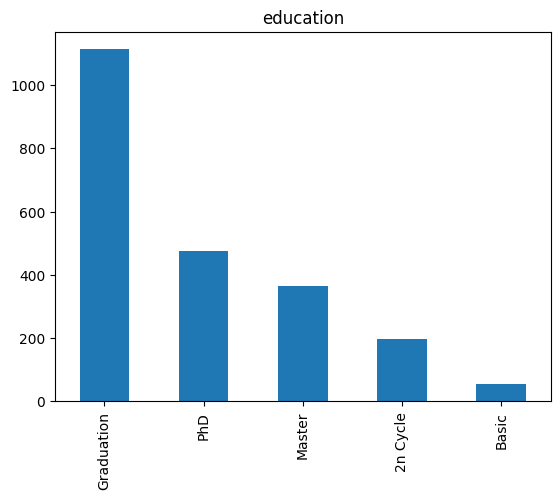

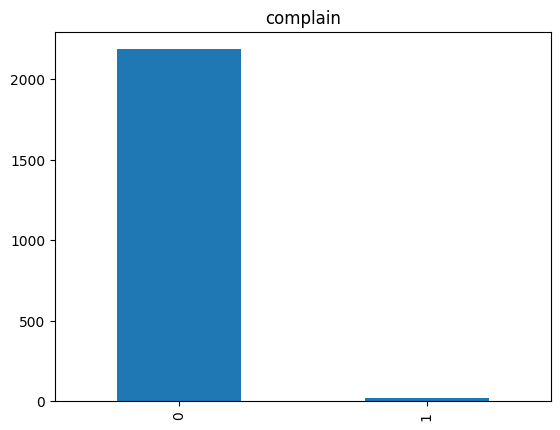

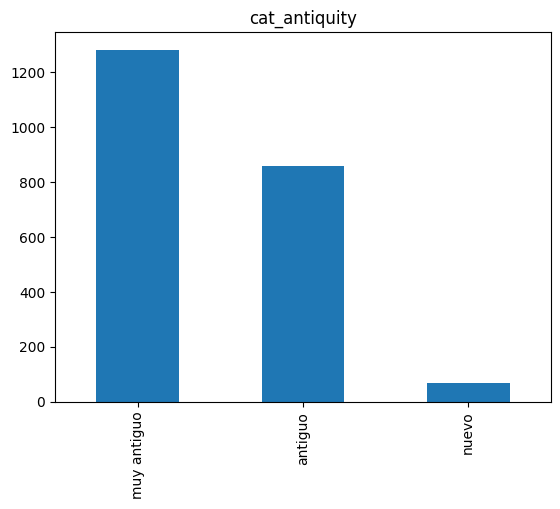

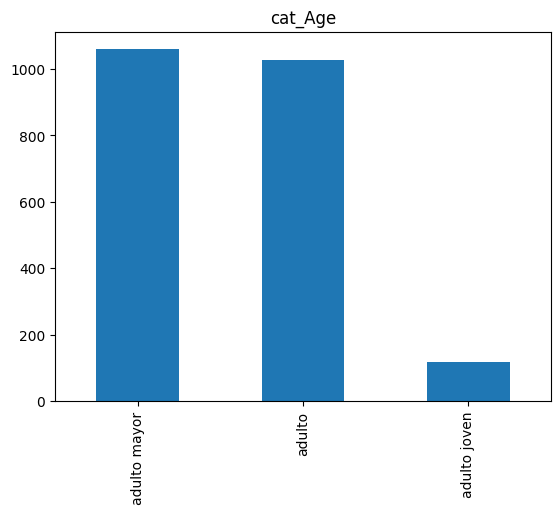

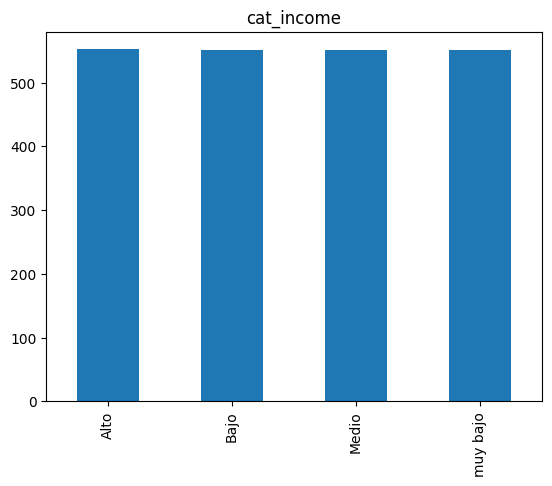

In [56]:
# Creación de listas y graficos de barras

for col in df.select_dtypes('category').columns:
  df[col].value_counts().plot(kind='bar')
  plt.title(col)
  plt.show()

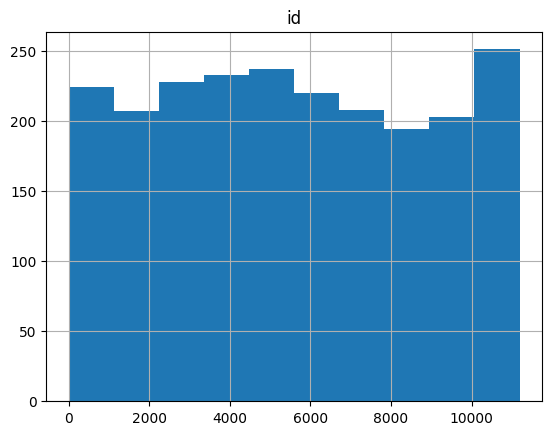

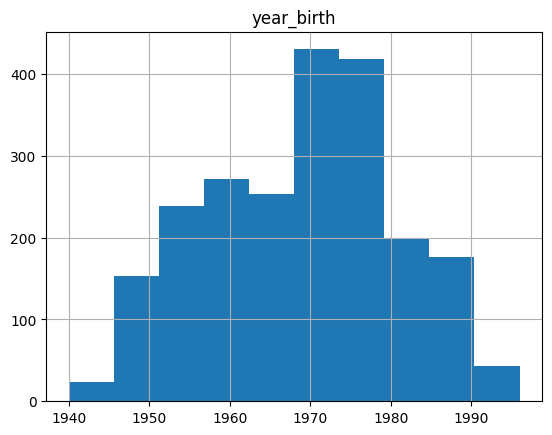

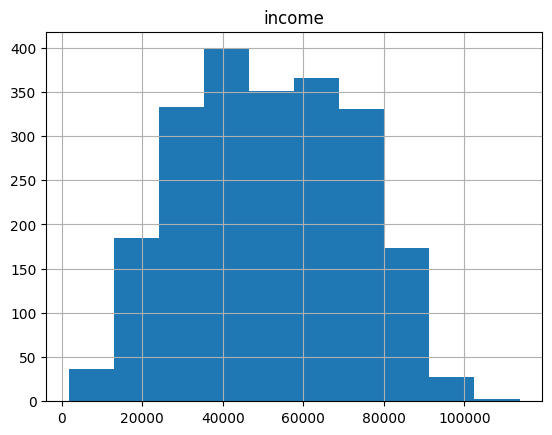

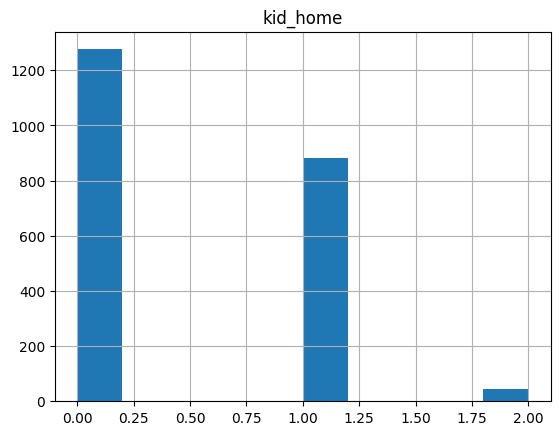

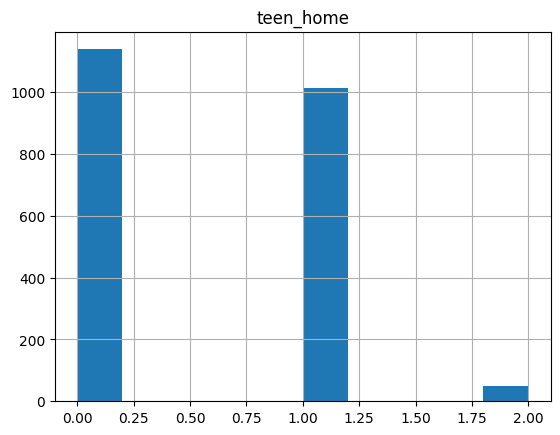

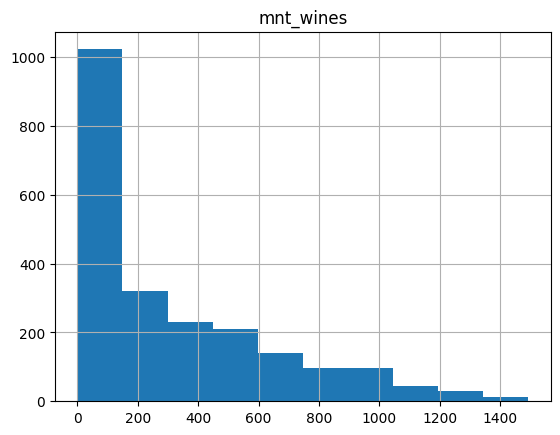

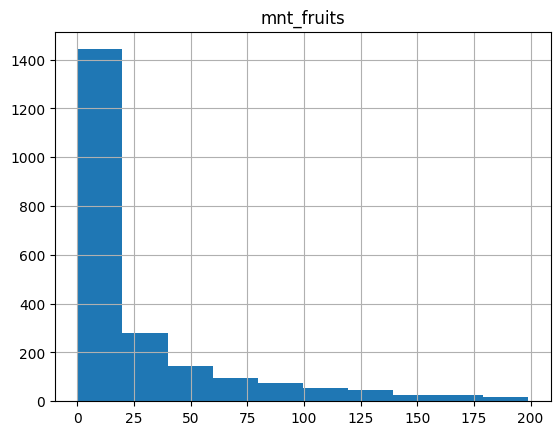

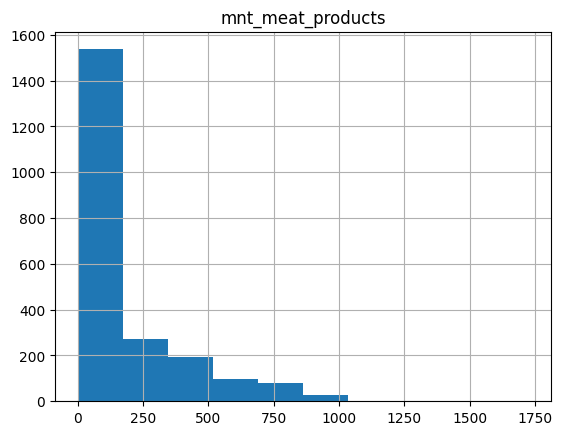

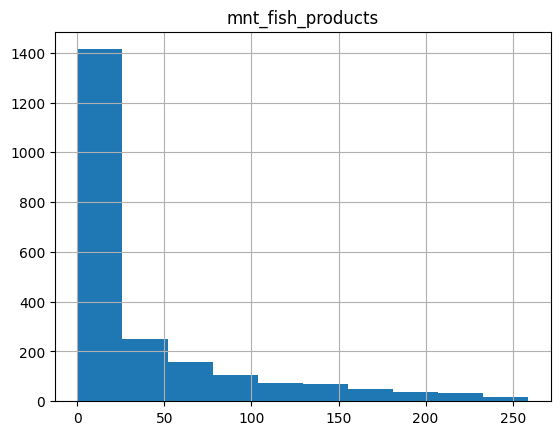

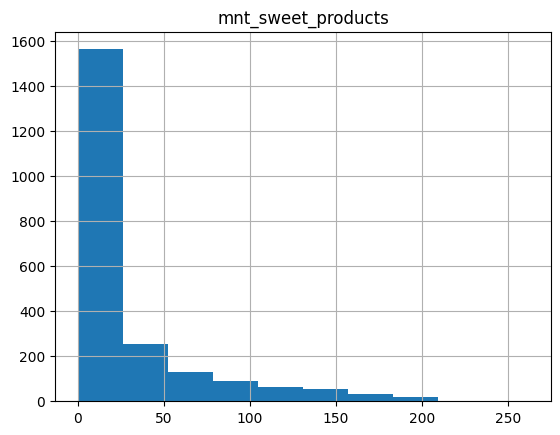

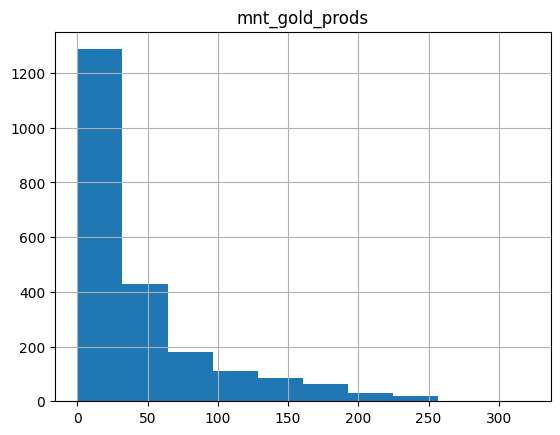

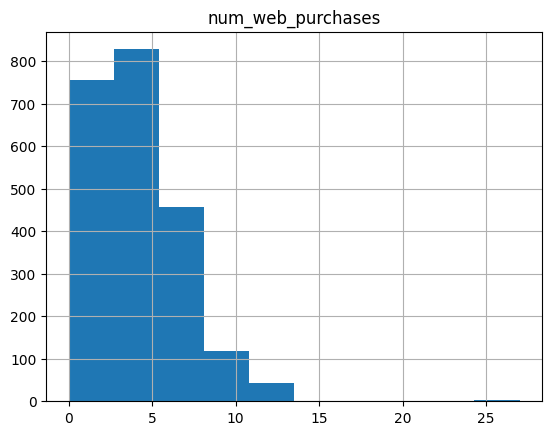

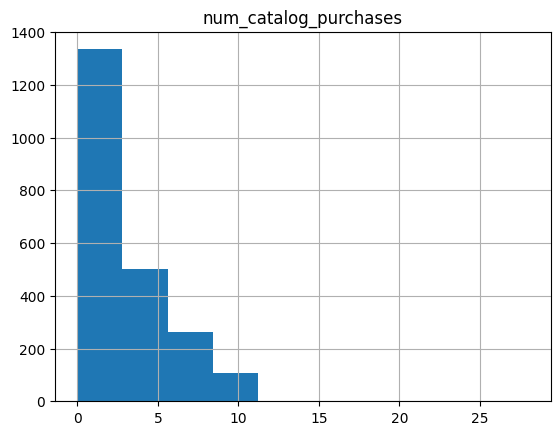

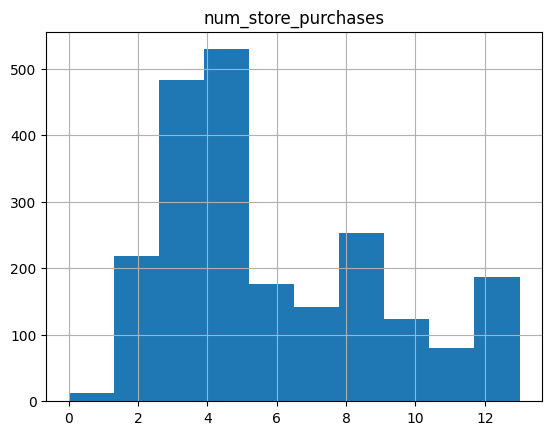

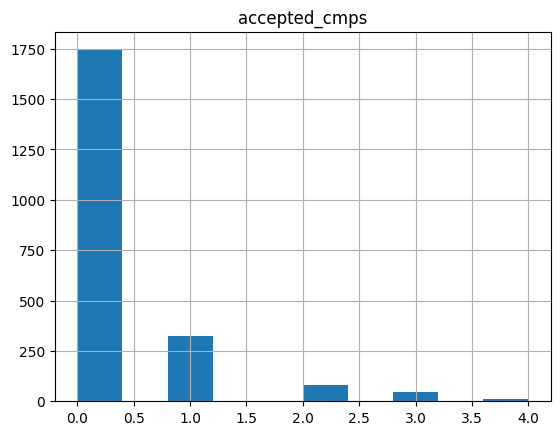

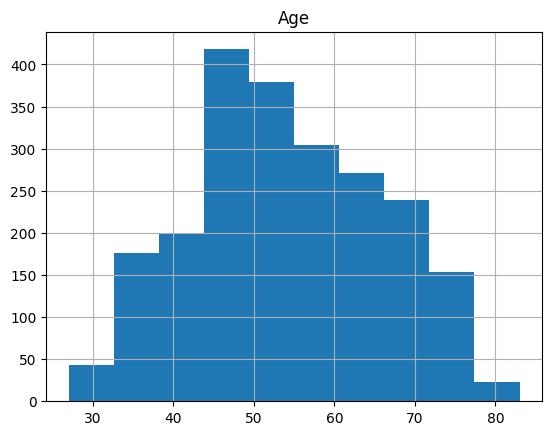

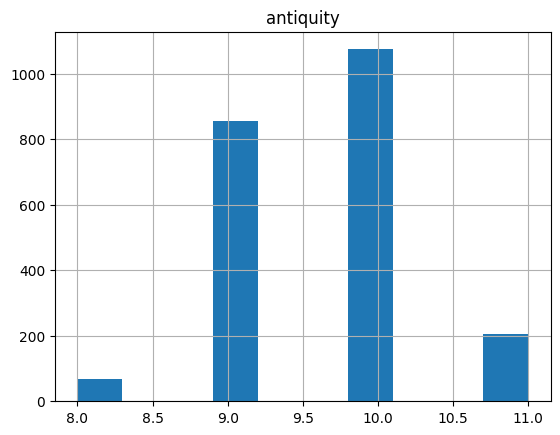

In [57]:
for col in df.select_dtypes('int64').columns:
  df[col].hist()
  plt.title(col)
  plt.show()

<ipython-input-58-f6fcd95aa2c0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

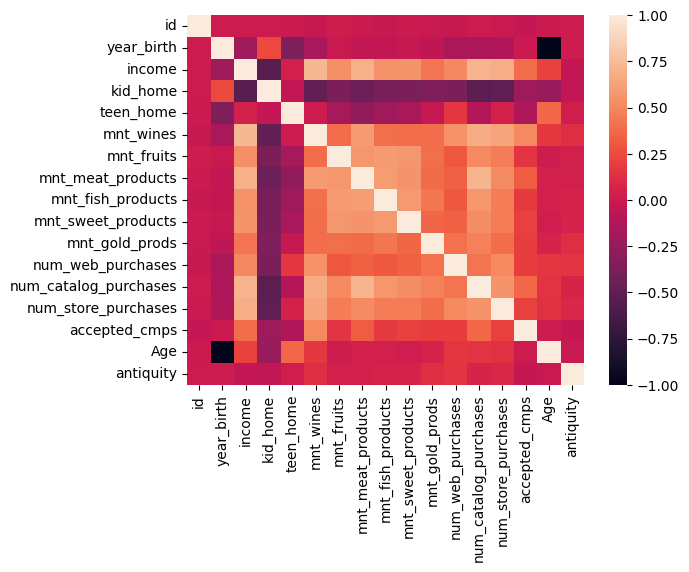

In [58]:
# CORRELOGRAMA

sns.heatmap(df.corr())

In [59]:
# Segmentar los ingresos de las personas por edad y por su estado civil

from statistics import mode
df.pivot_table(index=['marital_status','cat_income', ], values='income', aggfunc=mode)

income
marital_status cat_income        
Married        Alto         80134
               Bajo         39922
               Medio        67445
               muy bajo      7500
Single         Alto         82800
               Bajo         35860
               Medio        63841
               muy bajo      7500
Widow          Alto         82032
               Bajo         42429
               Medio        58330
               muy bajo     30372

In [60]:
# Realizar segmentacion que muestre la cantidad de jovenes que hay en casa, dependiendo de su edad y su nivel educativo

df.pivot_table(index=['education','cat_income'], values=['teen_home', 'kid_home'], aggfunc=mode)

kid_home  teen_home
education  cat_income                     
2n Cycle   Alto               0          0
           Bajo               1          1
           Medio              0          1
           muy bajo           1          0
Basic      muy bajo           1          0
Graduation Alto               0          0
           Bajo               1          1
           Medio              0          1
           muy bajo           1          0
Master     Alto               0          0
           Bajo               1          1
           Medio              0          1
           muy bajo           1          0
PhD        Alto               0          0
           Bajo               1          1
           Medio              0          1
           muy bajo           1          0

In [61]:
# Segmentación del numero de compras que se realizan por catálogo, tienda o internet, dependiendo de la categoria de edad y de su nivel educativo

df.pivot_table(index=['cat_antiquity','complain'], values=['num_catalog_purchases','num_web_purchases','num_store_purchases'], aggfunc=mode)

num_catalog_purchases  num_store_purchases  \
cat_antiquity complain                                               
antiguo       0                             0                    3   
              1                             0                    3   
muy antiguo   0                             0                    3   
              1                             0                    3   
nuevo         0                             0                    4   

                        num_web_purchases  
cat_antiquity complain                     
antiguo       0                         2  
              1                         3  
muy antiguo   0                         2  
              1                         2  
nuevo         0                         1

In [62]:
df.pivot_table(index=['cat_Age', ], values=['mnt_wines','mnt_fruits','mnt_meat_products','mnt_fish_products','mnt_sweet_products','mnt_gold_prods'], aggfunc=mode)

,mnt_fish_products,mnt_fruits,mnt_gold_prods,mnt_meat_products,mnt_sweet_products,mnt_wines
cat_Age,,,,,,
adulto,0,0,3,8,0,2
adulto joven,8,4,4,8,4,5
adulto mayor,0,0,4,3,0,6


**CONCLUSIONES**

**Segmentación ingresos de las personas por edad y por su estado civil**

Se puede concluir que, en el caso de los ingresos altos, las personas solteras superan en ingresos a las personas casadas y viudas. En contraste, en el grupo de ingresos bajos, los viudos tienen un ingreso superior, seguidos por las personas casadas y solteras. En cuanto a los ingresos medios, las personas casadas tienen los ingresos más altos, seguidas por las solteras y las viudas. Por último, en el caso de los ingresos muy bajos, se destaca que las personas viudas generalmente tienen ingresos más altos.


**Segmentación cantidad de jovenes que hay en casa, dependiendo de su edad y su nivel educativo**

Se puede concluir que para las personas con nivel educativo de bachillerato y con niveles de ingresos bajos suelen tener tanto un niño como un adolecente en casa, los que tienen niveles de ingresos medios tienen un hijo adolecente, los que tienen un nivel educativo de básica primaria e ingresos muy bajos tienen un niño en sus hogares.
Respecto a las personas con un título de pregrado, los que tienen niveles de ingresos bajos tienen un niño y un adolecente en casa, mientras que los de ingresos medios suelen tener un adolecente y los de ingresos bajos poseen un niño.
Para las personas con maestría y PhD, se puede evidenciar que los que tienen ingresos bajos tienen en su hogar un niño y un adolecente, seguidos de los que tienen ingresos medios que solo tienen un hijo adolecente y los de ingresos muy bajos tienen un niño pequeño.

**Segmentación cantidad de jovenes que hay en casa, dependiendo de su edad y su nivel educativo**

En cuanto a la elección del lugar para realizar compras, es evidente que tanto los clientes nuevos, los antiguos y los muy antiguos muestran una inclinación hacia las compras en tiendas físicas, seguidas de las compras en línea, siendo las compras por catálogo la opción menos preferida.

**Segmentación del numero de compras que se realizan por catálogo, tienda o internet, dependiendo de la categoria de edad y de su nivel educativo**

Al analizar los patrones de gasto según grupos de edad, se destaca que los adultos mayores muestran un mayor gasto en vinos, seguidos por los adultos jóvenes y luego por los adultos en general. En contraste, los adultos jóvenes tienden a consumir más dulces, pescados y frutas en comparación con los adultos y adultos mayores, tanto los adultos como los adultos jóvenes tienen una mayor inclinación hacia el consumo de productos cárnicos en comparación con los adultos mayores. Por último, en lo que respecta a productos suntuosos, se observa que tanto los adultos mayores como los adultos jóvenes tienen una mayor tendencia al consumo en comparación con los adultos.


[ ]
